In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
df_index=pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [62]:
##drop unecessary column
df_index.drop(columns=["Unnamed: 0","year","month"], axis=1, inplace=True)
df_index.head()


,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [63]:
##check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

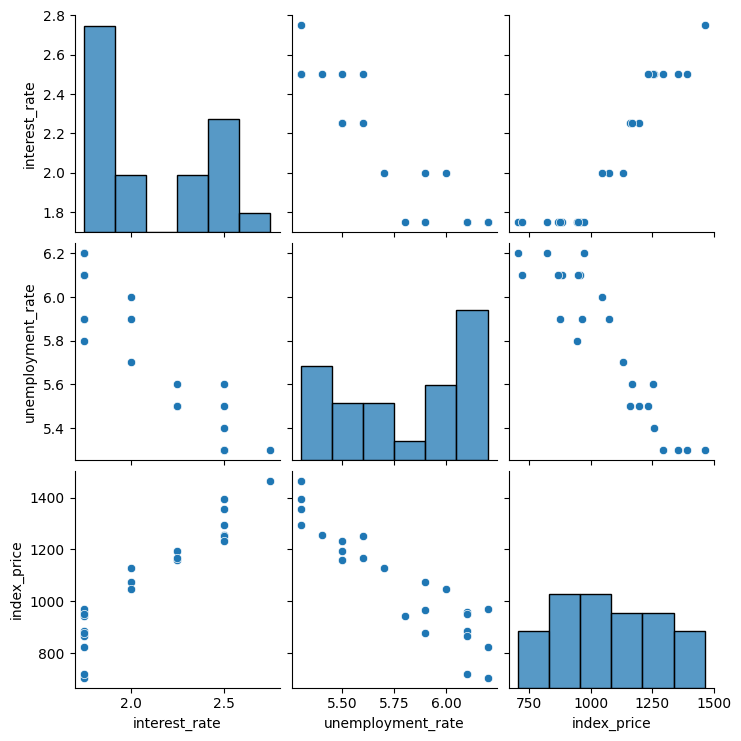

In [64]:
##Lets do some visuzalization
import seaborn as sns
sns.pairplot(df_index)

In [65]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

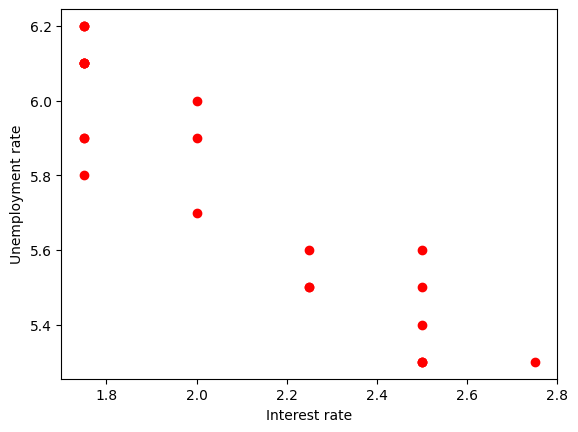

In [66]:
##visualize data points more closely
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'],color='r')
plt.xlabel("Interest rate")
plt.ylabel("Unemployment rate")

In [67]:
##independent and dependant features
X=df_index[['interest_rate','unemployment_rate']]
##or X=df_index.iloc[:, :-1]
y=df_index.iloc[:,-1]

In [68]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [69]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [70]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
import seaborn as sns


<Axes: xlabel='interest_rate', ylabel='index_price'>

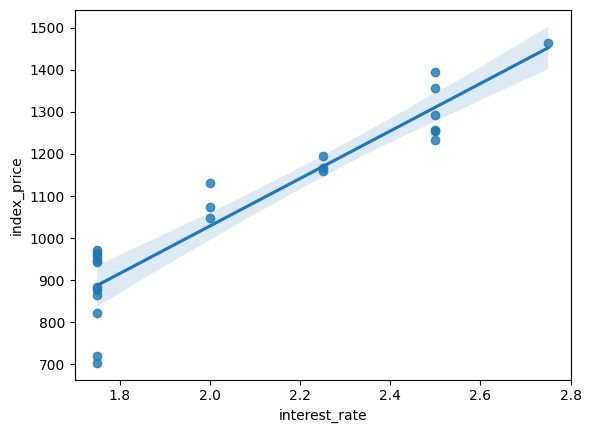

In [72]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='unemployment_rate', ylabel='index_price'>

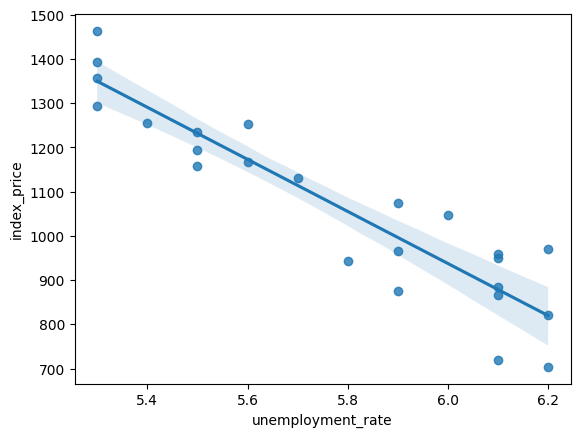

In [73]:
sns.regplot(x='unemployment_rate', y='index_price',data=df_index)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
##fit transforms into   2D array
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [76]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [77]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [78]:
##Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [79]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [80]:
np.mean(validation_score)

np.float64(-5914.8281801623925)

In [81]:
##prediction
y_pred=regression.predict(X_test)

In [82]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [83]:
##Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [84]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse, mae, rmse)

8108.567426306607 73.80444932337097 90.04758423359623


In [85]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.7591371539010257

In [86]:
r2_adjusted = 1 - (1 - score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
r2_adjusted

0.5985619231683761

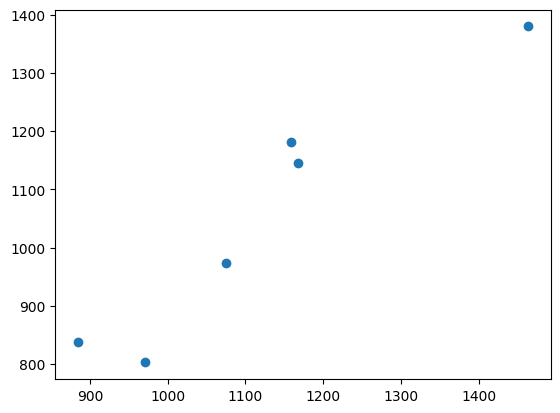

In [ ]:
##Assumptions
plt.scatter(y_test, y_pred)
#linear relationship implies that model has performed well

In [88]:
residuals=y_test-y_pred
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

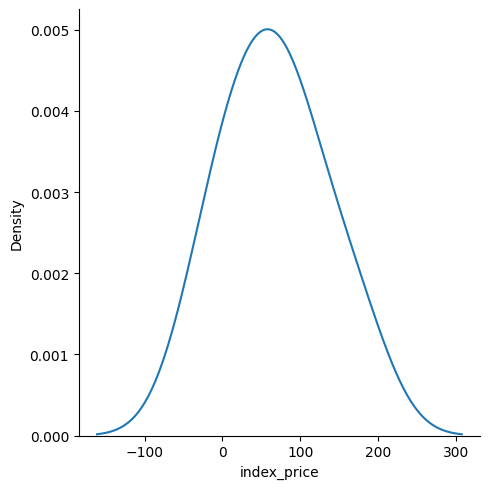

In [90]:
##Plot this residuals
sns.displot(residuals, kind='kde')

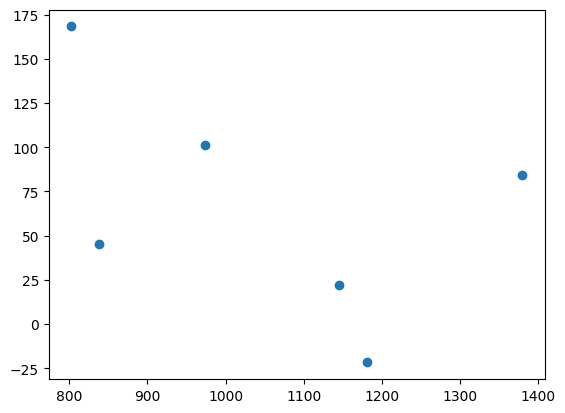

In [ ]:
##scatter plot wrt to prediction and residuals
plt.scatter(y_pred, residuals)
##they should not follow any pattern